<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/NNopencv_DNN_Object_Detection%2C_Depth_Analysis_and_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np



In [3]:
with open("/content/coco.txt", "r") as l:
  class_names = l.read().split("\n")




In [4]:
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [5]:
model = cv2.dnn.readNetFromTensorflow(model="/content/frozen_inference_graph.pb",
                                      config="/content/ssd_mobilenet_v2_coco_2018_03_29.pbtxt.txt")


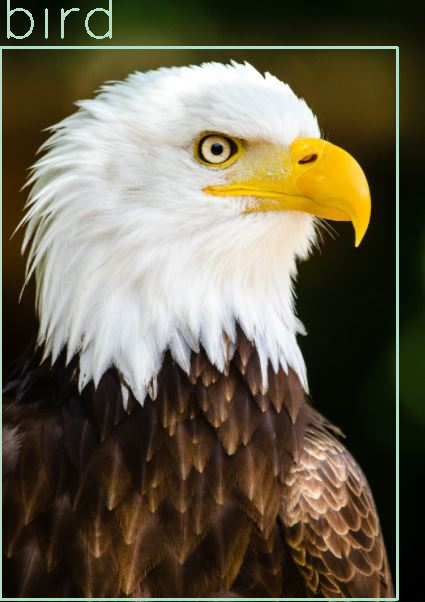

In [6]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/test_1.JPG")

height, width, _ = img.shape

blob = cv2.dnn.blobFromImage(img, size=(300, 300), mean=(127.5, 127.5, 127.5), swapRB=True)

model.setInput(blob)

detections = model.forward()


for detection in detections[0,0,:,:]:
  confidence = detection[2]
  if confidence > 0.5:
    class_id = detection[1]
    class_name = class_names[int(class_id)-1]
    color = colors[int(class_id)]
    x1 = int(detection[3]*width)
    y1 = int(detection[4]*height)
    x2 = int(detection[5]*width)
    y2 = int(detection[6]*height)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)
    cv2.putText(img, class_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)


cv2_imshow(img)
cv2.imwrite("output.jpg", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

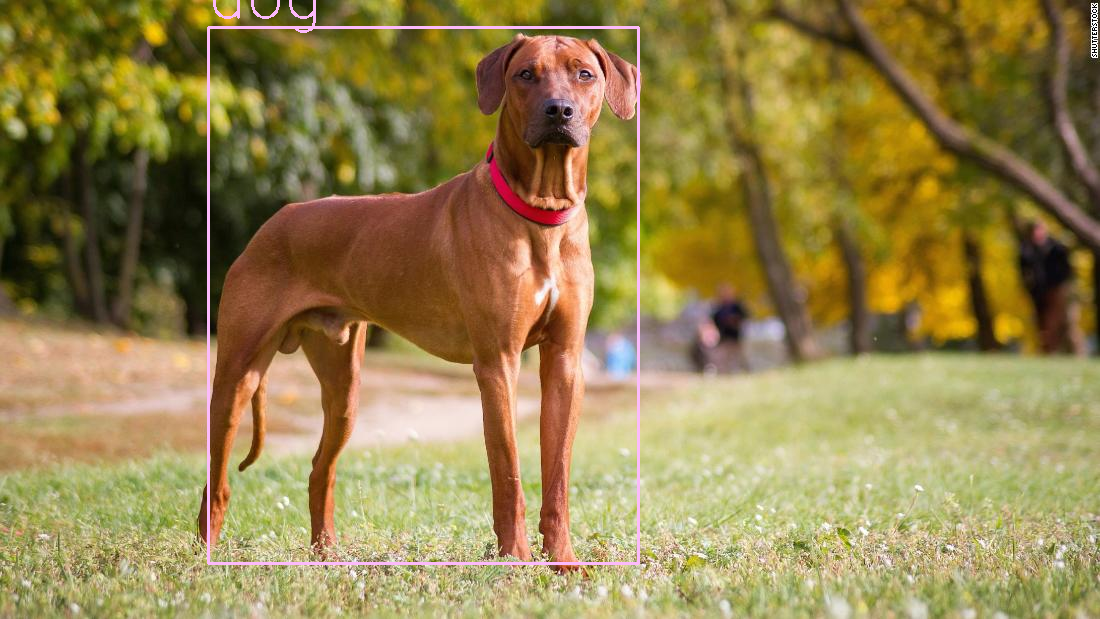

In [7]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/test_2.jpg")

height, width, _ = img.shape

blob = cv2.dnn.blobFromImage(img, size=(300, 300), mean=(127.5, 127.5, 127.5), swapRB=True)

model.setInput(blob)

detections = model.forward()


for detection in detections[0,0,:,:]:
  confidence = detection[2]
  if confidence > 0.5:
    class_id = detection[1]
    class_name = class_names[int(class_id)-1]
    color = colors[int(class_id)]
    x1 = int(detection[3]*width)
    y1 = int(detection[4]*height)
    x2 = int(detection[5]*width)
    y2 = int(detection[6]*height)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)
    cv2.putText(img, class_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)


cv2_imshow(img)
cv2.imwrite("output.jpg", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
"""
cap = cv2.VideoCapture("/content/test.mp4")


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/output_video.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    height, width, _ = frame.shape

    blob = cv2.dnn.blobFromImage(frame, size=(300, 300), mean=(104, 117, 123), swapRB=True)
    model.setInput(blob)
    detections = model.forward()

    for detection in detections[0, 0, :, :]:
        confidence = detection[2]
        if confidence > 0.5:
            class_id = int(detection[1])
            class_name = class_names[class_id - 1]
            color = colors[class_id % len(colors)]

            x = int(detection[3] * width)
            y = int(detection[4] * height)
            w = int((detection[5] - detection[3]) * width)
            h = int((detection[6] - detection[4]) * height)

            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


    out.write(frame)


    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
"""

'\ncap = cv2.VideoCapture("/content/test.mp4")\n\n\nfourcc = cv2.VideoWriter_fourcc(*\'mp4v\')  \nout = cv2.VideoWriter(\'/content/output_video.mp4\', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))\n\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    if not ret:\n        break\n\n    height, width, _ = frame.shape\n\n    blob = cv2.dnn.blobFromImage(frame, size=(300, 300), mean=(104, 117, 123), swapRB=True)\n    model.setInput(blob)\n    detections = model.forward()\n\n    for detection in detections[0, 0, :, :]:\n        confidence = detection[2]\n        if confidence > 0.5:\n            class_id = int(detection[1])\n            class_name = class_names[class_id - 1]\n            color = colors[class_id % len(colors)]\n\n            x = int(detection[3] * width)\n            y = int(detection[4] * height)\n            w = int((detection[5] - detection[3]) * width)\n            h = int((detection[6] - detection[4]) * height)\n\n            cv2.rectangle(frame, (x, y), (x + w,

In [8]:
depth_model = "/content/drive/MyDrive/video/model-f6b98070.onnx"

depth_model_x = cv2.dnn.readNet(depth_model)
c = (123.675, 116.28, 103.53)

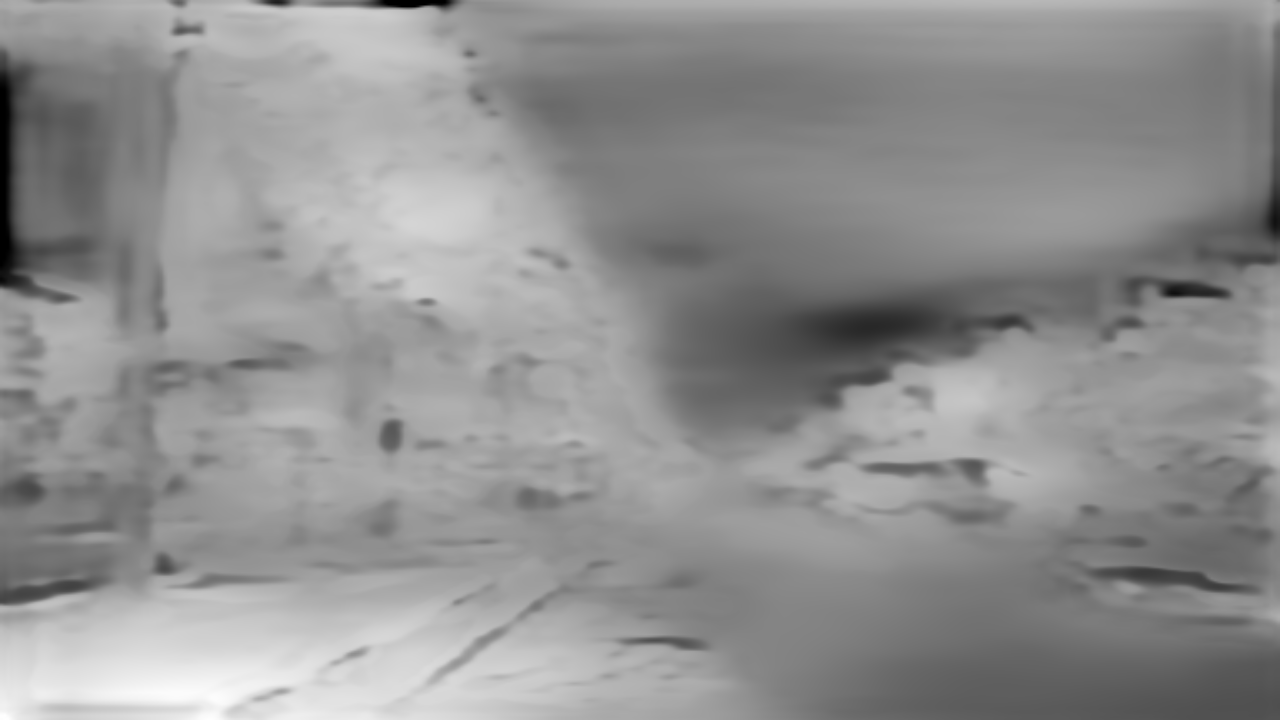

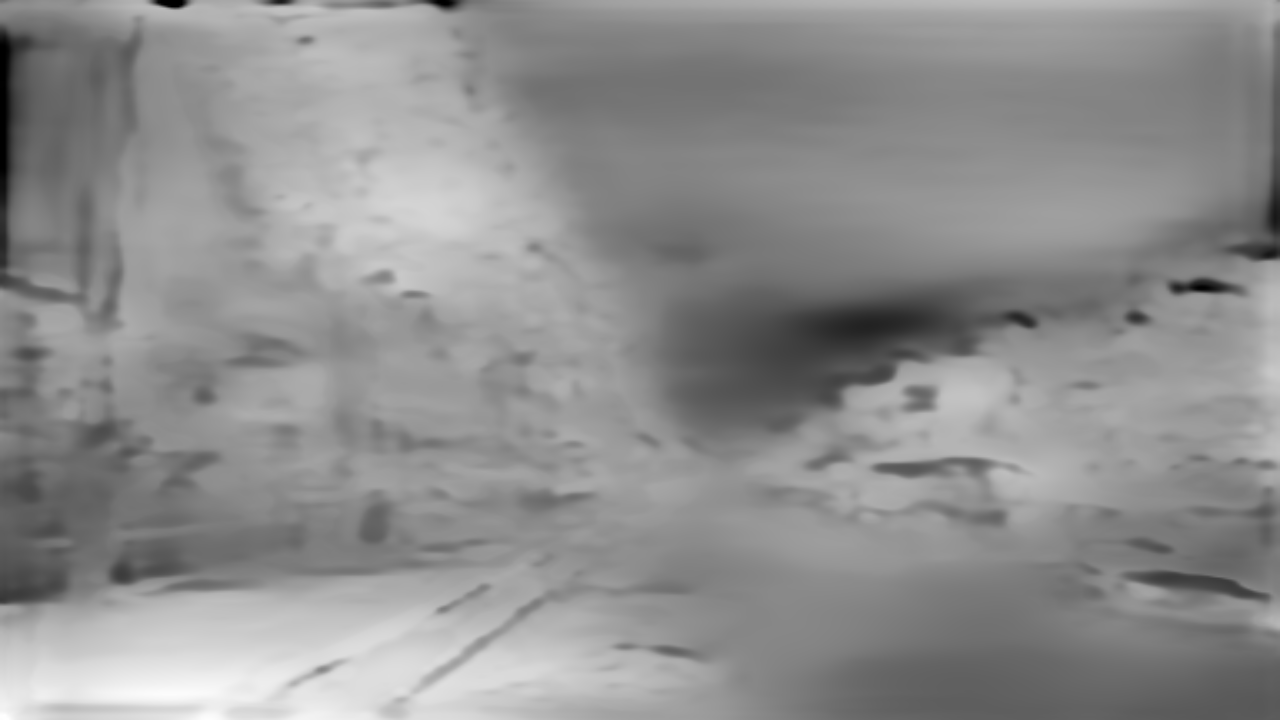

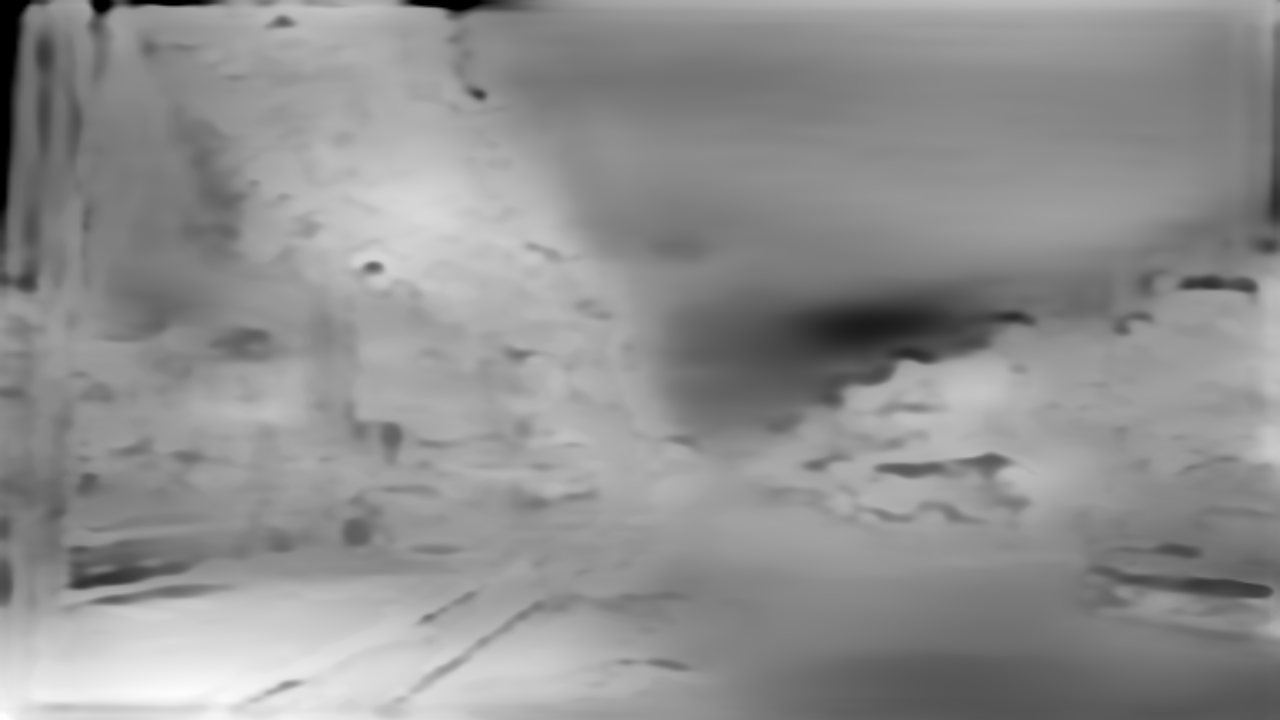

KeyboardInterrupt: 

In [11]:
import cv2
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture("/content/test.mp4")


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/output_video.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))), isColor=False)


display_frame_count = 0
max_display_frames = 3

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    blob = cv2.dnn.blobFromImage(img, size=(384, 384), mean=(123.675, 116.28, 103.53))

    depth_model_x.setInput(blob)
    output = depth_model_x.forward()

    output = output[0, :, :]
    output = cv2.resize(output, (frame.shape[1], frame.shape[0]))

    depth = cv2.normalize(output, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    out.write(depth)


    if display_frame_count < max_display_frames:
        cv2_imshow(depth)
        display_frame_count += 1

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


# Face Detection

In [12]:
img = cv2.imread("/content/face.jpg")

model = cv2.dnn.readNetFromCaffe("/content/deploy.prototxt.txt",
                                 "/content/res10_300x300_ssd_iter_140000.caffemodel")

In [13]:
height, width, channel = img.shape

blob = cv2.dnn.blobFromImage(
    cv2.resize(img, (300, 300)),
    1.0,
    (300, 300),
    (104.0, 177.0, 123.0),
)

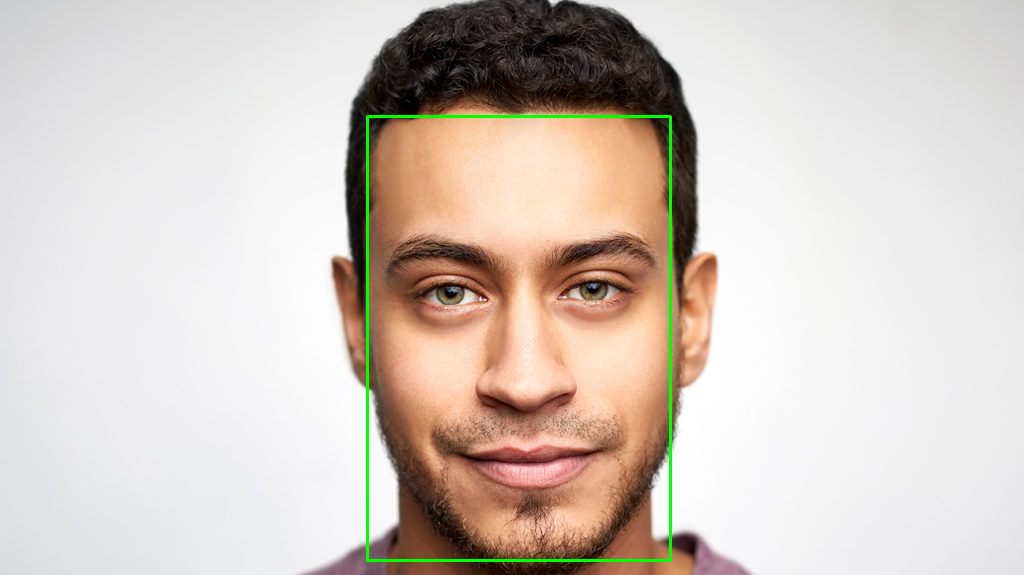

In [15]:
model.setInput(blob)
output = model.forward()

for detection in range(0, output.shape[2]):

    confidence = output[0,0,detection,2]

    if confidence > .5:

        loc = output[0,0,detection,3:7] * np.array([width, height, width, height])
        (x1, y1, x2, y2) = loc.astype("int")

        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), thickness=2)


cv2_imshow(img)
cv2.imwrite("result.jpg", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output video:
https://youtu.be/poXZXCx8Qbo